In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Input:
df = pd.read_csv("Metazygia monitor 1-test.csv")
min_day=1440
total_time = len(df.index)
num_days = total_time//min_day
column=df.columns[2:-1]
display(df)

,Date_Time,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,...,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32,Date_Time.1
0,2017-04-21 00:00:00,0,0,0,0,0,1,3,0,0,...,0.0,0,0,0,2,5,0,0,0,2017-04-21 00:00:00
1,2017-04-21 00:01:00,0,0,0,0,0,0,9,0,0,...,0.0,0,0,0,5,10,0,0,0,2017-04-21 00:01:00
2,2017-04-21 00:02:00,0,0,0,0,0,7,2,0,0,...,0.0,0,0,4,4,4,0,0,0,2017-04-21 00:02:00
3,2017-04-21 00:03:00,0,0,0,0,0,6,0,0,0,...,0.0,0,0,0,5,4,0,0,0,2017-04-21 00:03:00
4,2017-04-21 00:04:00,0,0,0,0,2,2,0,0,0,...,0.0,0,0,0,3,2,0,0,0,2017-04-21 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,2017-05-04 23:55:00
20156,2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,2017-05-04 23:56:00
20157,2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,2017-05-04 23:57:00
20158,2017-05-04 23:58:00,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,2017-05-04 23:58:00


In [2]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

In [3]:
def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]
    return start1, start2, end1, end2

In [4]:
#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        #Run function to determine when lights are off during LD cycle
        else:
            start1, start2, end1, end2 = plot_night_test(df1)
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')

In [5]:
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df):
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    min_day=1440
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        total_time = len(dftest.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
        fig.suptitle(column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        ax[num_days-1].set_xticks(range(0, min_day, 360))
        plt.xlabel('Time')
        #save figure
        #fig.savefig(column[spider] +'raster.jpg')
        #plt.show()
        print('Next spider')

Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider


<ipython-input-5-046c24a694d8>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)


Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider


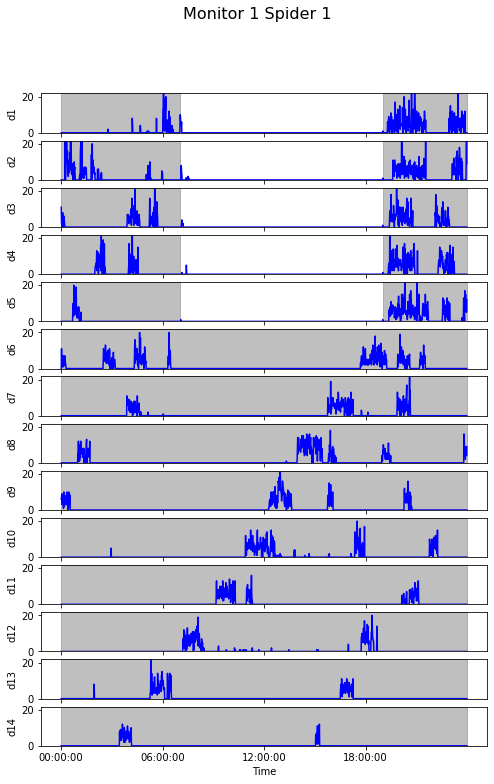

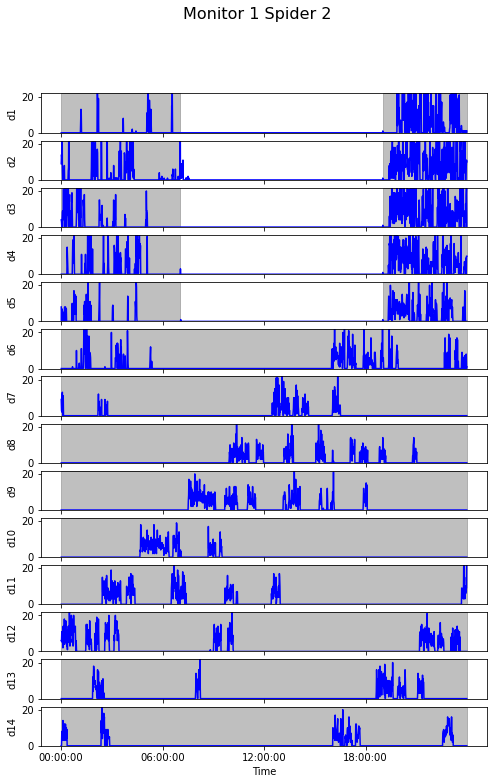

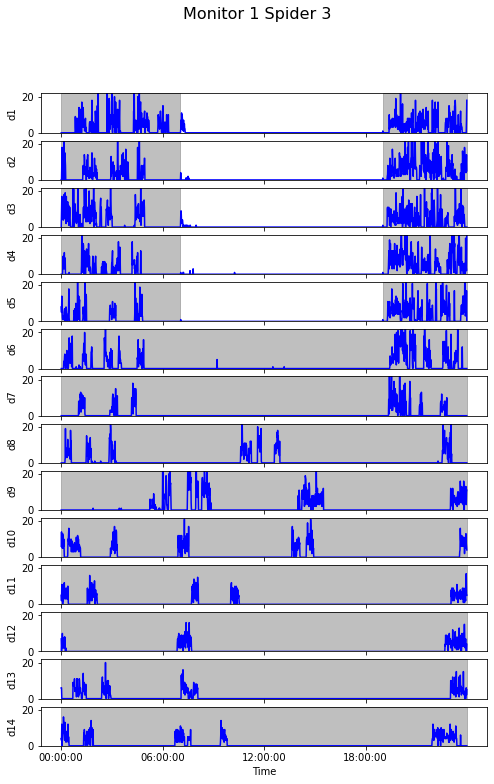

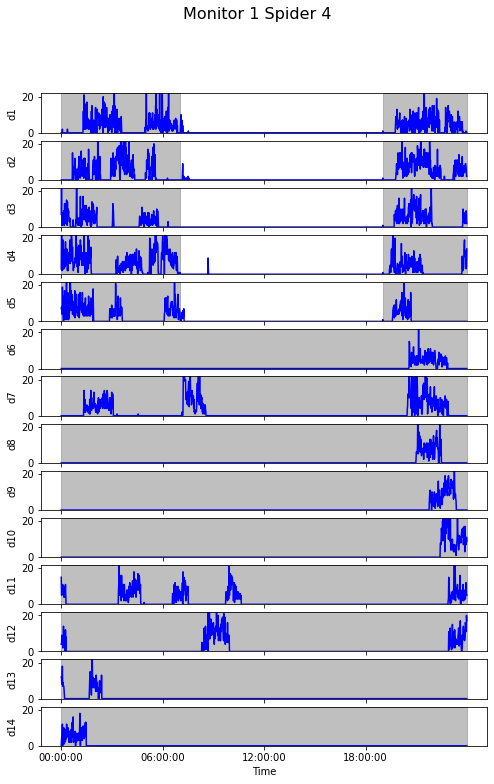

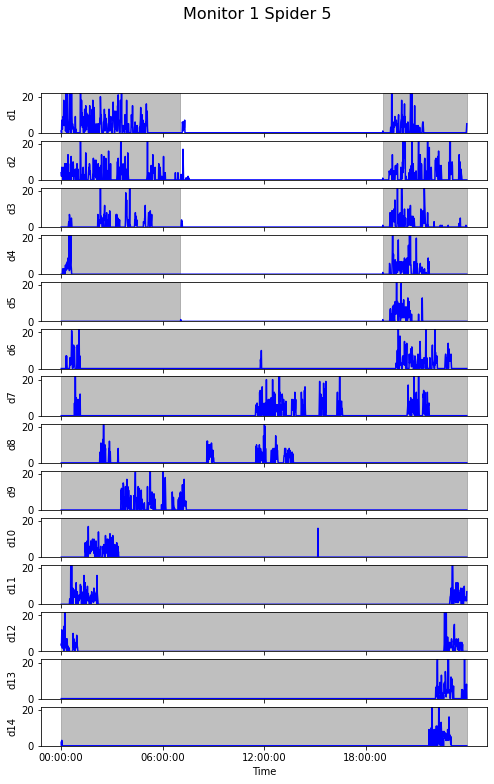

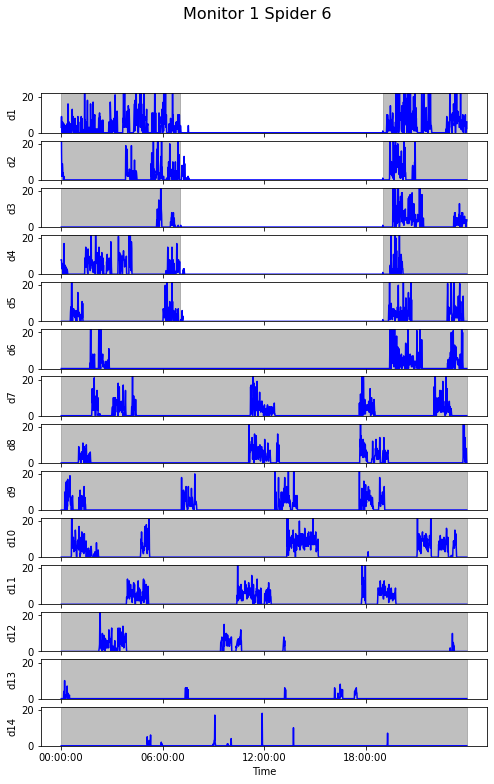

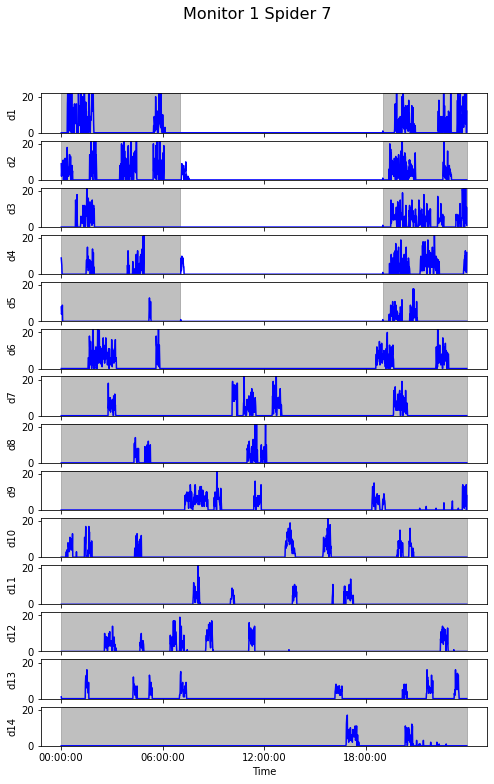

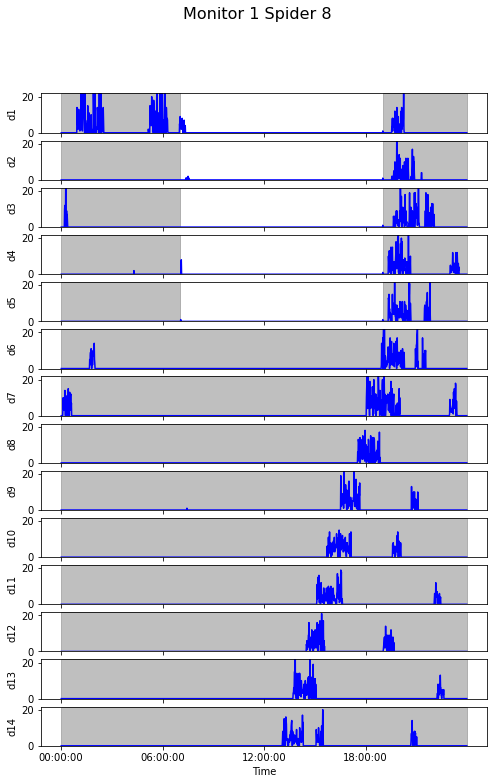

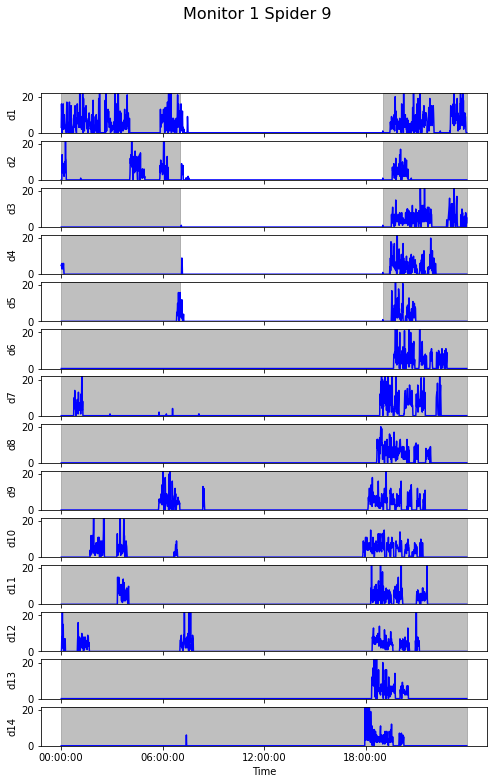

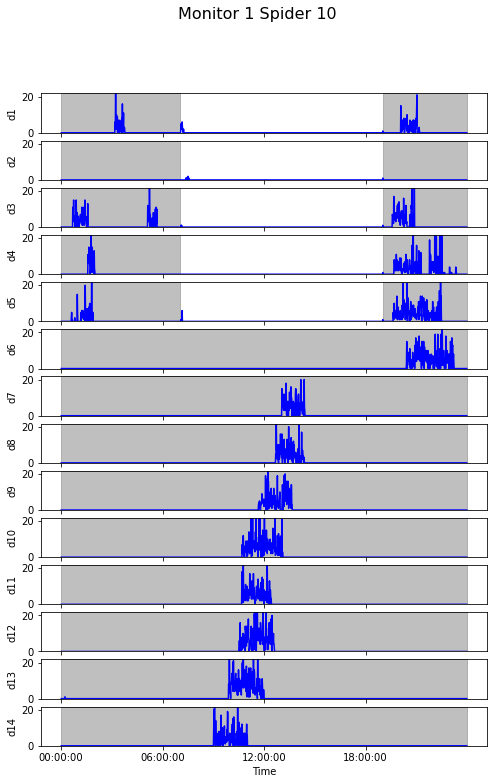

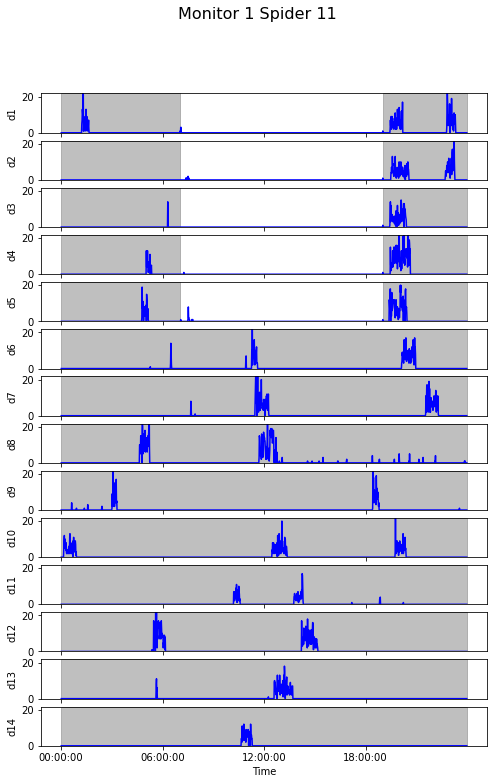

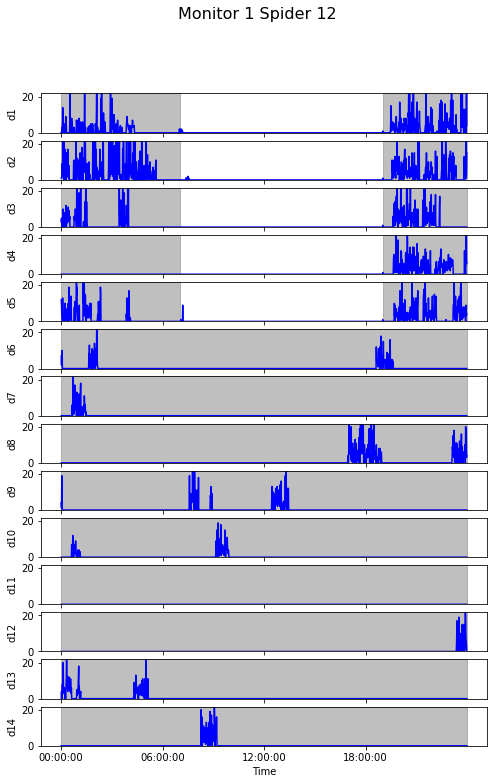

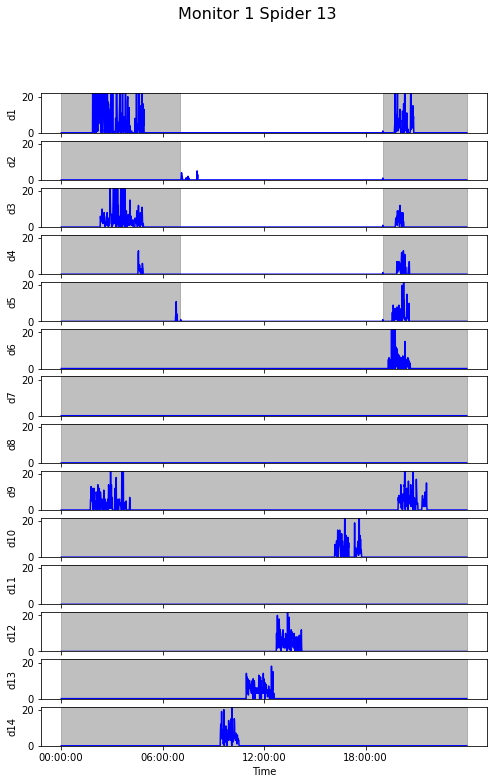

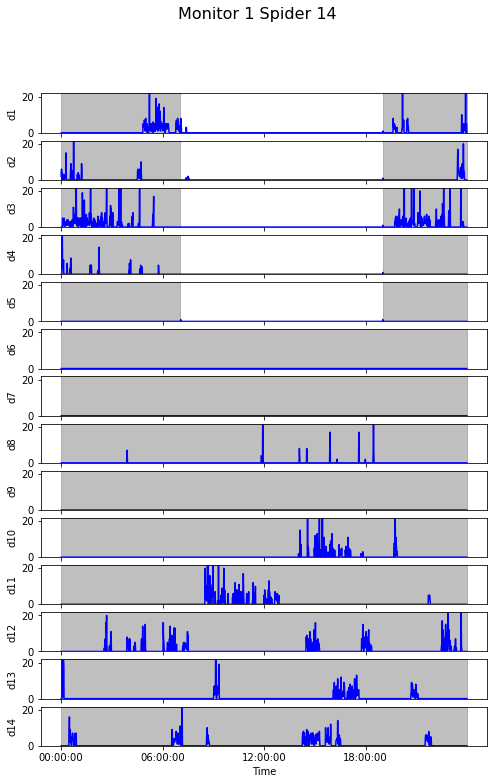

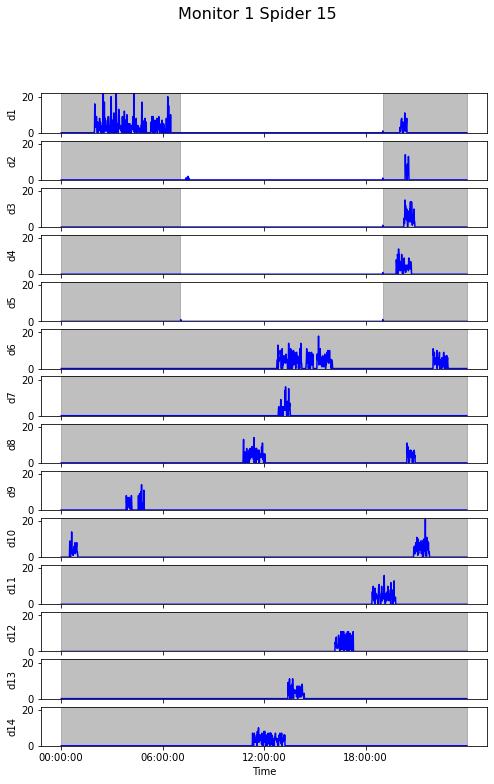

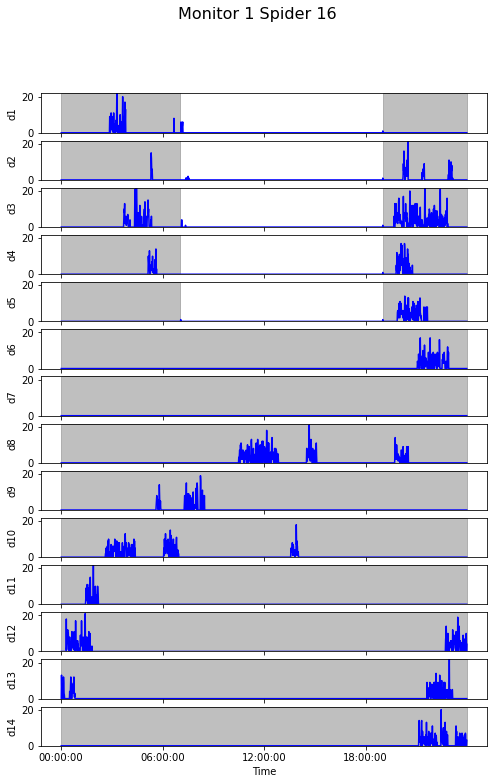

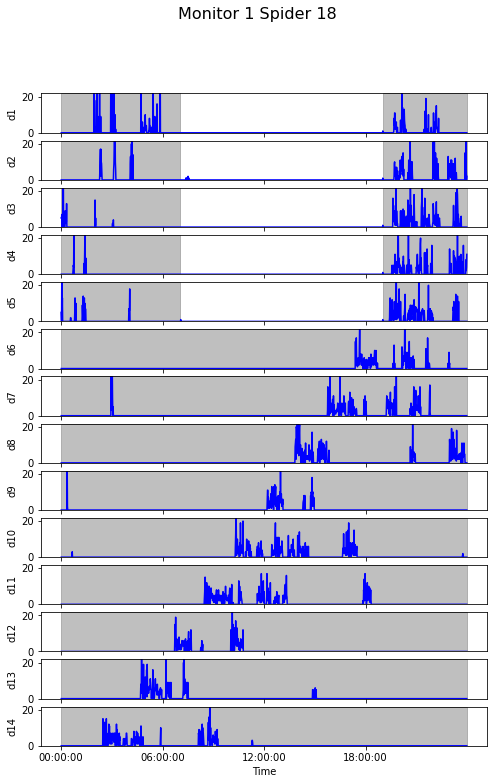

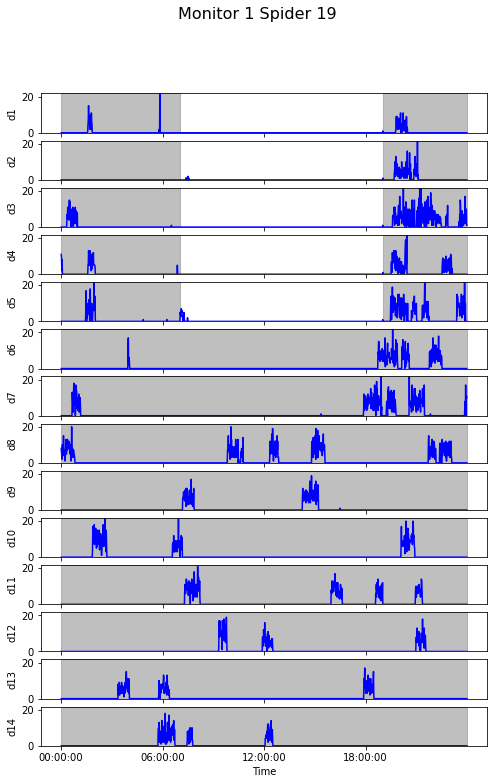

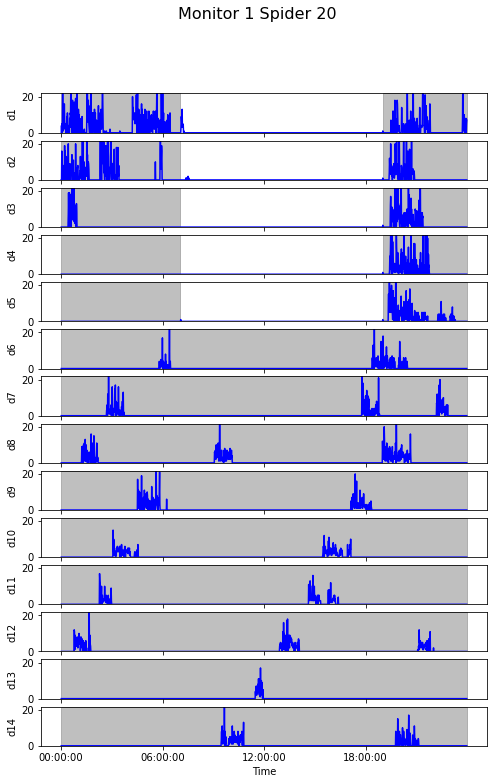

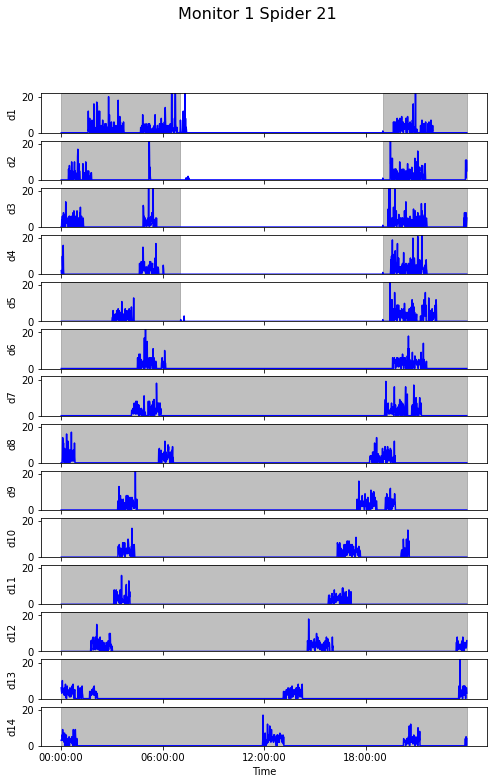

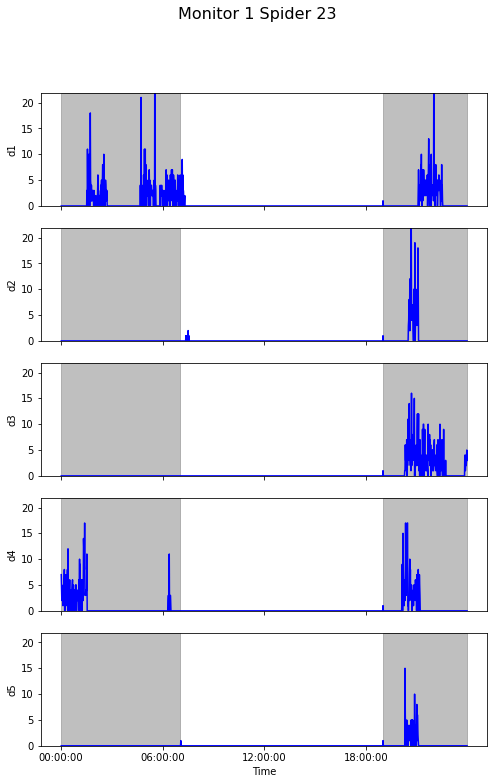

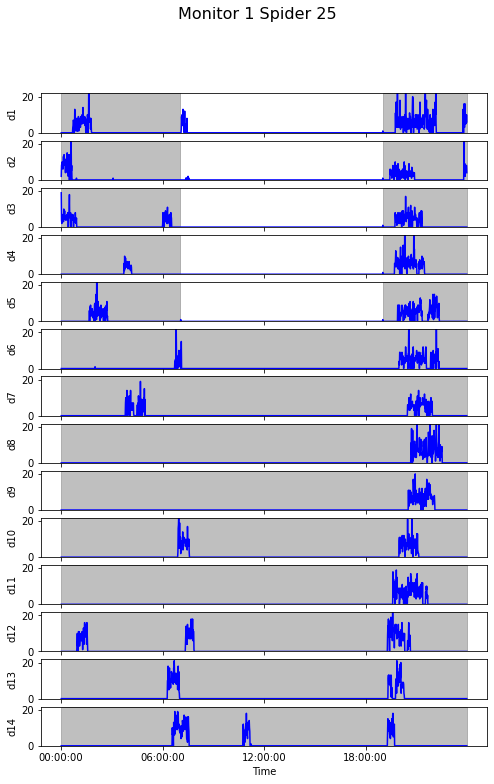

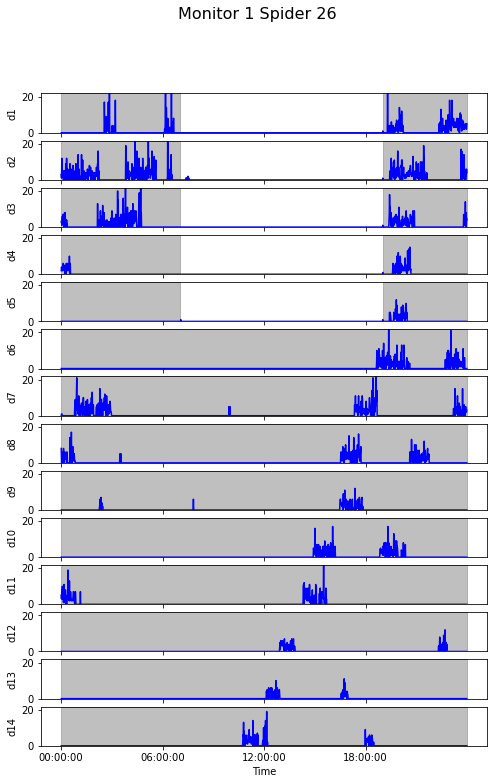

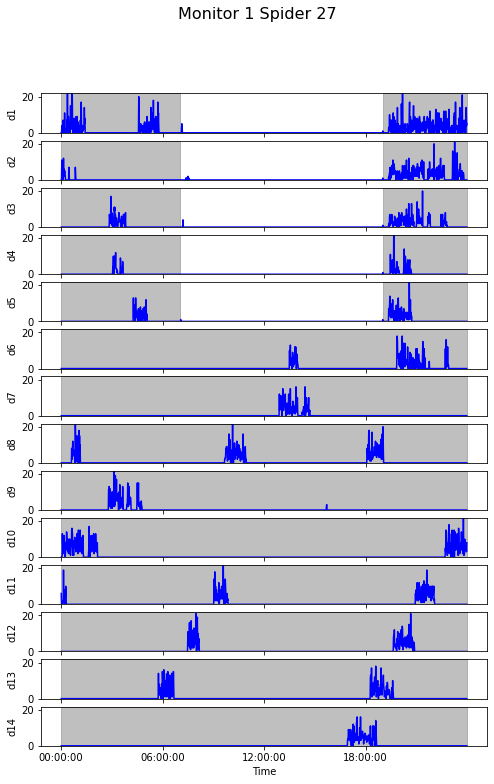

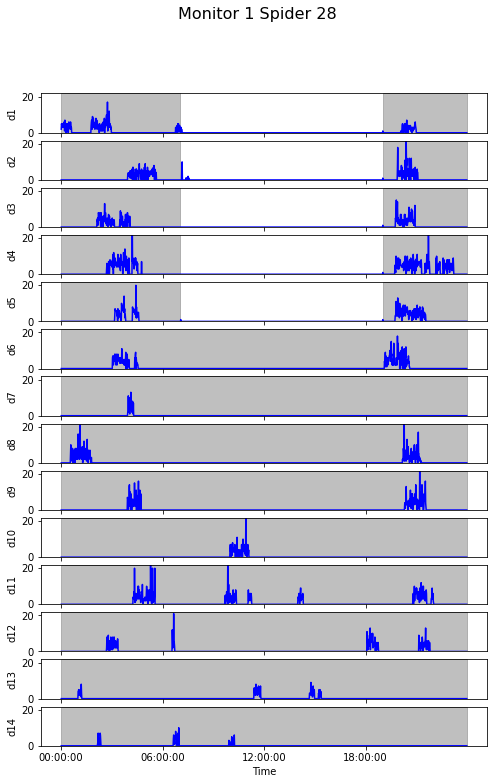

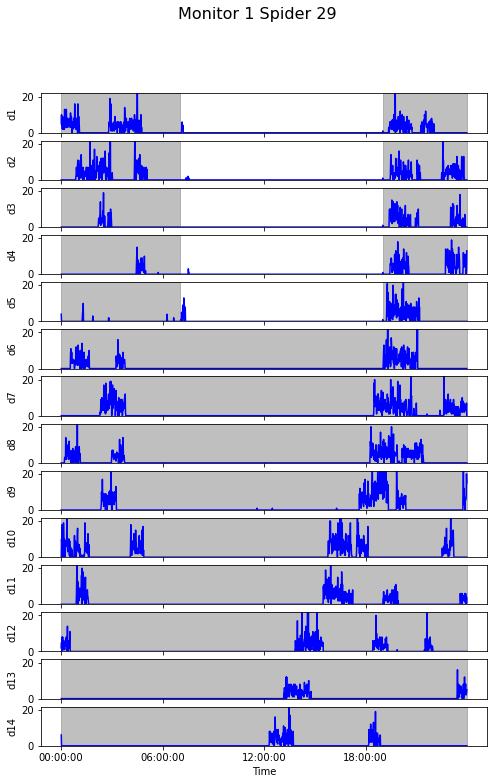

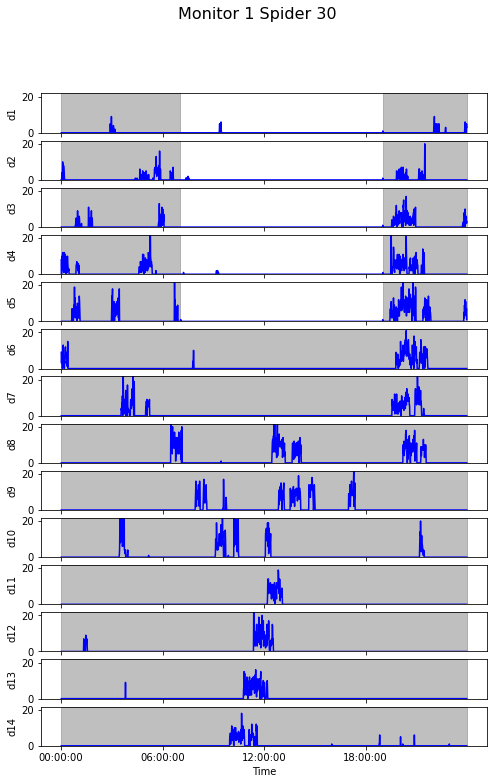

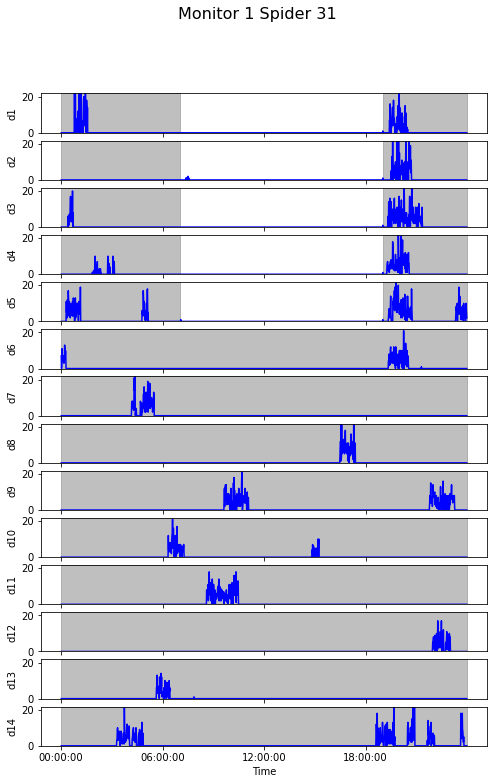

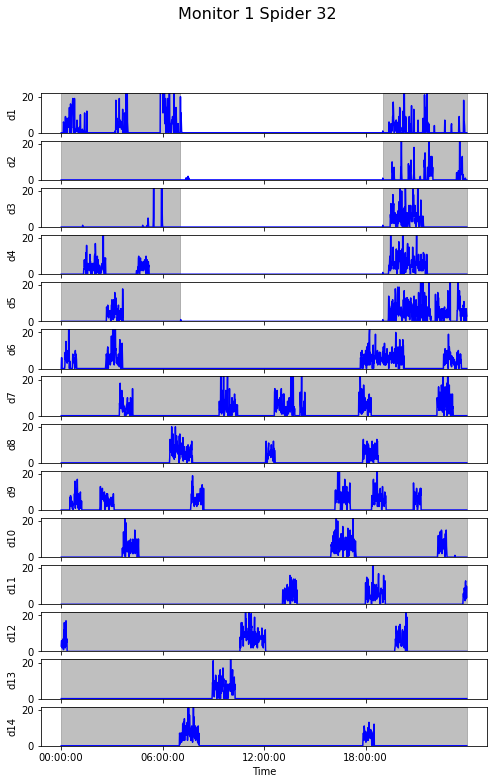

In [6]:
spider_raster(df)